In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

In [2]:

nn2020skolik_path = "../../results/nn_final/nn2020_skolik"

nn2020skolik = Analysis(nn2020skolik_path)


In [3]:

nn2020skolik_reward = nn2020skolik.get_rewards()

nn2020skolik_average_reward = np.mean(nn2020skolik_reward, axis=0)
nn2020skolik_std_reward = np.std(nn2020skolik_reward, axis=0)

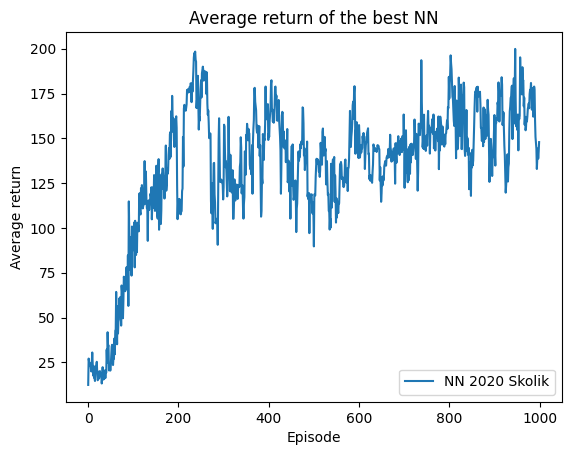

In [4]:
plt.plot(nn2020skolik_average_reward, label="NN 2020 Skolik")
plt.title("Average return of the best NN")
plt.xlabel("Episode")
plt.ylabel("Average return")
plt.legend()
plt.show()


In [5]:
nn_2020_gradients = nn2020skolik.get_gradients()

In [6]:
nn_2020_flattened_gradients = []
for i in range(len(nn_2020_gradients)):
    aux = []
    for j in range(len(nn_2020_gradients[i])):
        flattened_arrays = [arr.flatten() for arr in nn_2020_gradients[i][j]]
        aux.append(np.concatenate(flattened_arrays))
    nn_2020_flattened_gradients.append(aux)

In [7]:
nn2020_flattend_gradients_min_len = min([len(arr) for arr in nn_2020_flattened_gradients])

nn_2020_flattened_gradients = [arr[:nn2020_flattend_gradients_min_len] for arr in nn_2020_flattened_gradients]

nn_2020_flattened_gradients = np.array(nn_2020_flattened_gradients)

In [8]:
nn_2020_flattened_gradients.shape

(10, 27260, 562)

In [9]:
nn_20_20_gradient_norms = np.linalg.norm(nn_2020_flattened_gradients, axis=2)

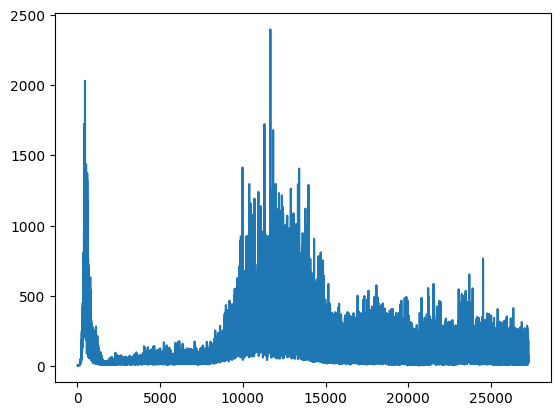

In [14]:
plt.plot(nn_20_20_gradient_norms[1], label="NN 2020 Skolik")
plt.show()

In [13]:
nn_2020_mean_gradient_norms = np.mean(nn_20_20_gradient_norms, axis=0)

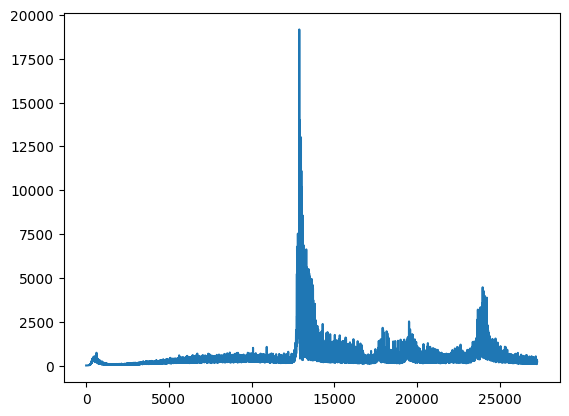

In [14]:
plt.plot(nn_2020_mean_gradient_norms, label="NN 2020 Skolik")